In [63]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
def warn(*args, **kwargs): pass
import warnings
warnings.warn = warn

### Load Data

In [5]:
# temp.to_csv('score_QK_v2.csv',index=False)
score_QK = pd.read_csv('../score_QK_v2.csv')
# score_QK_extra = pd.read_csv('../score_QK_extra.csv')

In [6]:
score_QK.head()

,company,date,adjust_datetime,return,bad,url,QK,Negative,Positive,Uncertainty,Litigious,StrongModal,WeakModal,Constraining
0,A,2000-03-15,2000-03-15,0.680463,1.0,/Archives/edgar/data/1090872/00009120570001170...,Q,508,176,250,304,63,143,116
1,A,2000-06-12,2000-06-12,0.937685,0.0,/Archives/edgar/data/1090872/00009120570002820...,Q,494,133,223,278,42,133,97
2,A,2000-09-01,2000-09-01,0.893940,0.0,/Archives/edgar/data/1090872/00009120570004000...,Q,490,117,208,273,33,121,114
3,A,2001-01-17,2001-01-17,0.557929,1.0,/Archives/edgar/data/1090872/00010958110100022...,K,569,172,231,284,47,126,127
4,A,2001-03-19,2001-03-19,0.947393,0.0,/Archives/edgar/data/1090872/00010958110100163...,Q,449,121,200,232,40,123,111


In [4]:
score_QK_extra.head()

,company,date,adjust_datetime,return,bad,url,QK,score
0,A,2000-03-15,2000-03-15,0.680463,1.0,/Archives/edgar/data/1090872/00009120570001170...,Q,"[532, 176, 255, 305, 63, 143, 139]"
1,A,2000-06-12,2000-06-12,0.937685,0.0,/Archives/edgar/data/1090872/00009120570002820...,Q,"[518, 134, 227, 279, 42, 133, 120]"
2,A,2000-09-01,2000-09-01,0.893940,0.0,/Archives/edgar/data/1090872/00009120570004000...,Q,"[513, 117, 212, 274, 33, 121, 137]"
3,A,2001-01-17,2001-01-17,0.557929,1.0,/Archives/edgar/data/1090872/00010958110100022...,K,"[594, 172, 234, 285, 47, 126, 147]"
4,A,2001-03-19,2001-03-19,0.947393,0.0,/Archives/edgar/data/1090872/00010958110100163...,Q,"[472, 121, 205, 234, 40, 123, 133]"


In [2]:
sec_op = pd.read_csv('cutted_data_opaque_sp.csv')

In [3]:
sec_op.head()

,company,date,adjust_starttime,adjust_endtime,return,bad,url,QK,opaque,sec,SP_return
0,A,2000-03-15,2000-03-15,2000-06-12,0.680463,1.0,/Archives/edgar/data/1090872/00009120570001170...,Q,0.0,35,0.978001
1,A,2000-06-12,2000-06-12,2000-09-01,0.937685,0.0,/Archives/edgar/data/1090872/00009120570002820...,Q,0.0,35,1.013764
2,A,2000-09-01,2000-09-01,2001-01-17,0.893940,0.0,/Archives/edgar/data/1090872/00009120570004000...,Q,0.0,35,0.878735
3,A,2001-01-17,2001-01-17,2001-03-19,0.557929,1.0,/Archives/edgar/data/1090872/00010958110100022...,K,0.0,35,0.865028
4,A,2001-03-19,2001-03-19,2001-06-14,0.947393,0.0,/Archives/edgar/data/1090872/00010958110100163...,Q,0.0,35,1.107807


In [7]:
np.unique(sec_op['sec'].values)

array([ 0, 10, 15, 20, 25, 30, 35, 40, 45, 50, 55, 60])

##### Merge data and opaque

In [7]:
score_QK_op = pd.merge(score_QK,sec_op,how='left')
# score_QK_extra_op = pd.merge(score_QK_extra,sec_op,how='left')

In [14]:
score_combine_emotion = score_QK_op.dropna()

##### filter na and opaque=0

In [35]:
score_QK_extra_op[score_QK_extra_op['opaque']==0]

,company,date,adjust_datetime,return,bad,url,QK,score,adjust_starttime,adjust_endtime,opaque,sec,SP_return
0,A,2000-03-15,2000-03-15,0.680463,1.0,/Archives/edgar/data/1090872/00009120570001170...,Q,"[532, 176, 255, 305, 63, 143, 139]",2000-03-15,2000-06-12,0.0,35,0.978001
1,A,2000-06-12,2000-06-12,0.937685,0.0,/Archives/edgar/data/1090872/00009120570002820...,Q,"[518, 134, 227, 279, 42, 133, 120]",2000-06-12,2000-09-01,0.0,35,1.013764
2,A,2000-09-01,2000-09-01,0.893940,0.0,/Archives/edgar/data/1090872/00009120570004000...,Q,"[513, 117, 212, 274, 33, 121, 137]",2000-09-01,2001-01-17,0.0,35,0.878735
3,A,2001-01-17,2001-01-17,0.557929,1.0,/Archives/edgar/data/1090872/00010958110100022...,K,"[594, 172, 234, 285, 47, 126, 147]",2001-01-17,2001-03-19,0.0,35,0.865028
4,A,2001-03-19,2001-03-19,0.947393,0.0,/Archives/edgar/data/1090872/00010958110100163...,Q,"[472, 121, 205, 234, 40, 123, 133]",2001-03-19,2001-06-14,0.0,35,1.107807
5,A,2001-06-14,2001-06-14,0.821604,0.0,/Archives/edgar/data/1090872/00008916180150118...,Q,"[542, 124, 213, 227, 47, 130, 127]",2001-06-14,2001-09-14,0.0,35,0.877723
6,A,2001-09-14,2001-09-14,1.462535,0.0,/Archives/edgar/data/1090872/00010958110150492...,Q,"[596, 146, 240, 224, 55, 144, 145]",2001-09-14,2002-01-22,0.0,35,1.186779
75,A,2018-12-20,2018-12-20,1.031854,0.0,/Archives/edgar/data/1090872/00010908721800001...,K,"[707, 257, 300, 226, 52, 60, 240]",2018-12-20,2016-12-01,0.0,35,NaN
76,AA,2016-12-01,2016-12-01,1.281695,0.0,/Archives/edgar/data/1675149/00011931251678270...,Q,"[499, 180, 130, 136, 24, 31, 96]",2016-12-01,2017-03-15,0.0,0,1.051996
77,AA,2017-03-15,2017-03-15,0.953943,0.0,/Archives/edgar/data/1675149/00011931251708386...,K,"[1354, 370, 310, 424, 81, 91, 383]",2017-03-15,2017-05-10,0.0,0,1.016896


##### make score to each sentiment

In [10]:
def split_score(df,outputfile):
    emotion=['Negative','Positive','Uncertainty','Litigious','StrongModal','WeakModal','Constraining']
    emotion=pd.DataFrame(columns=emotion)
    for i in range(df.shape[0]):
        try:
            emotion.loc[i]=df["score"].values[i][1:-1].split(",")
        except:
            emotion.loc[i]=0
    emotion=emotion.astype(float)
    emotion.index=df.index
    score_combine_emotion=pd.concat([df,emotion],axis=1)
    score_combine_emotion.to_csv(outputfile)
    
    return score_combine_emotion

In [ ]:
# score_combine_emotion_extra = split_score(score_QK_op_extra,"score_combine_emotion_QK_extra.csv")
score_combine_emotion = split_score(score_QK_op,"score_combine_emotion_QK_op.csv")

In [ ]:
score_combine_emotion_extra = split_score(score_QK_extra_op,"score_combine_emotion_QK_extra.csv")

In [15]:
score_combine_emotion = pd.read_csv("score_combine_emotion_QK_op.csv")
score_combine_emotion_extra = pd.read_csv("score_combine_emotion_QK_extra.csv")

In [16]:
print(score_combine_emotion.shape)
print(score_combine_emotion_extra.shape)

(228433, 19)
(236460, 20)


In [74]:
score_combine_emotion = score_combine_emotion.dropna()
score_combine_emotion_extra = score_combine_emotion_extra.dropna()

In [75]:
print(score_combine_emotion.shape)
print(score_combine_emotion_extra.shape)

(150291, 21)
(236460, 20)


In [15]:
score_combine_emotion_extra.to_csv("score_combine_emotion_QK_extra.csv",index=False)

In [17]:
score_combine_emotion_extra.shape

(236460, 20)

### Model and Train

In [17]:
from sklearn.metrics import accuracy_score, log_loss,confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC, LinearSVC, NuSVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from xgboost.sklearn import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.model_selection import GridSearchCV
import time

classifiers = [
#     KNeighborsClassifier(3,n_jobs=3),
# #     SVC(kernel="linear", C=0.025, probability=True),
# #     NuSVC(probability=True),
#     DecisionTreeClassifier(max_depth=5),
#     RandomForestClassifier(max_depth=5),
#     AdaBoostClassifier(),
#     GradientBoostingClassifier(),
#     GaussianNB(),
#     LinearDiscriminantAnalysis(),
#     QuadraticDiscriminantAnalysis(),
#     XGBClassifier(),
    LGBMClassifier()]

In [18]:
# Just emotion
def data_preprocessing_v1(score_combine_emotion):
    X=score_combine_emotion[['Negative','Positive', 'Uncertainty', 'Litigious', 'StrongModal', 'WeakModal','Constraining']]
    y=score_combine_emotion["bad"]
    desire_index=pd.concat([X,y],axis=1)[(X.sum(axis=1)>100)].index
    X=X.loc[desire_index].values
    y=y.loc[desire_index].values
#     linearly_separable = (X, y)
#     multiple=int(len(y)/len(y[y==1]))
    X = StandardScaler().fit_transform(X)
    
    return X,y,score_combine_emotion.loc[desire_index]

# emotion + opaque
# filter 0 opaque
def data_preprocessing_v2(score_combine_emotion):
    X=score_combine_emotion[['Negative','Positive', 'Uncertainty', 'Litigious', 'StrongModal', 'WeakModal','Constraining','opaque']]
    X_=score_combine_emotion[['opaque']]
    y=score_combine_emotion["bad"]
    desire_index=pd.concat([X,y],axis=1)[(X.sum(axis=1)>100)].index
    
    # filter emotion
    X_ = X_.loc[desire_index]
    
    # filter opaque
    desire_index2 = X_[X_['opaque'] > 0].index
    
    X=X.loc[desire_index2].values
    y=y.loc[desire_index2].values
#     linearly_separable = (X, y)
#     multiple=int(len(y)/len(y[y==1]))
    X = StandardScaler().fit_transform(X)
    
    return X,y,score_combine_emotion.loc[desire_index2]

# just opaque
def data_preprocessing_v3(score_combine_emotion):
    X=score_combine_emotion[['opaque']]
    y=score_combine_emotion["bad"]
    desire_index2 = X[X['opaque'] > 0].index
    X=X.loc[desire_index2].values
    y=y.loc[desire_index2].values
#     linearly_separable = (X, y)
#     multiple=int(len(y)/len(y[y==1]))
    X = StandardScaler().fit_transform(X)
    
    return X,y,score_combine_emotion.loc[desire_index2]

def error_adj(labels,pre):
    conf = confusion_matrix(labels,pre)
    accuracy = conf[0,0]+conf[1,1]
    length = np.sum(conf)+conf[1,0]*8
    
    return accuracy/length

In [188]:
def simple_prob(score_combine_emotion):
    X,y = data_preprocessing_v1(score_combine_emotion)
    X_so, y_so = data_preprocessing_v2(score_combine_emotion)
    X_o, y_o = data_preprocessing_v3(score_combine_emotion)
#     return X_so,y_so
#     clf1 = GradientBoostingClassifier()
#     clf2 = GradientBoostingClassifier()
#     clf3 = GradientBoostingClassifier()
#     clf1 = KNeighborsClassifier(3,n_jobs=3)
#     clf2 = KNeighborsClassifier(3,n_jobs=3)
#     clf3 = KNeighborsClassifier(3,n_jobs=3)

#     clf1 = LGBMClassifier(is_unbalance=True)
#     clf2 = LGBMClassifier(is_unbalance=True)
#     clf3 = LGBMClassifier(is_unbalance=True)
    clf1 = gbm1
    clf2 = gbm2
    clf3 = gbm3

    clf1.fit(X,y)
    clf2.fit(X_so,y_so)
    clf3.fit(X_o,y_o)
    
    train_predictions = clf1.predict_proba(X)
    train_predictions_so = clf2.predict_proba(X_so)
    train_predictions_o = clf3.predict_proba(X_o)

    score_combine_emotion['predictions with sentiment'] = train_predictions[:,1]
    score_combine_emotion['predictions with opaque'] = train_predictions_o[:,1]
    score_combine_emotion['predictions with opaque&sentiment'] = train_predictions_so[:,1]
    
    
#     score_combine_emotion.to_csv('Probality_for_UI.csv',index=False)
    
    return score_combine_emotion

In [152]:
X_so,y_so = simple_prob(score_combine_emotion)

In [189]:
UI = simple_prob(score_combine_emotion)

In [181]:
UI.head(20)

,company,date,return,bad,url,QK,opaque,sec,SP_return,score,Negative,Positive,Uncertainty,Litigious,StrongModal,WeakModal,Constraining,predictions with sentiment,predictions with opaque,predictions with opaque&sentiment
5,A,2002-01-22,1.034088,0.0,/Archives/edgar/data/1090872/00008916180200018...,K,2.303592,35,1.008404,"[663, 168, 262, 243, 54, 130, 156]",663.0,168.0,262.0,243.0,54.0,130.0,156.0,0.452038,0.359172,0.453956
6,A,2002-03-06,0.741458,0.0,/Archives/edgar/data/1090872/00008916180200104...,Q,2.303592,35,0.925112,"[547, 173, 257, 183, 41, 129, 132]",547.0,173.0,257.0,183.0,41.0,129.0,132.0,0.444147,0.359172,0.442889
7,A,2002-06-05,0.560176,1.0,/Archives/edgar/data/1090872/00008916180200270...,Q,2.303592,35,0.876167,"[569, 166, 267, 203, 31, 129, 147]",569.0,166.0,267.0,203.0,31.0,129.0,147.0,0.436337,0.359172,0.437875
8,A,2002-12-20,0.712024,1.0,/Archives/edgar/data/1090872/00008916180200562...,K,2.511690,35,0.947968,"[1197, 353, 448, 302, 93, 154, 284]",1197.0,353.0,448.0,302.0,93.0,154.0,284.0,0.351018,0.369175,0.386571
9,A,2003-03-12,1.192572,0.0,/Archives/edgar/data/1090872/00008916180300121...,Q,2.511690,35,1.090619,"[874, 256, 381, 283, 69, 145, 230]",874.0,256.0,381.0,283.0,69.0,145.0,230.0,0.421158,0.369175,0.428840
10,A,2003-06-04,1.312234,0.0,/Archives/edgar/data/1090872/00008916180300285...,Q,2.511690,35,1.024574,"[1045, 255, 407, 352, 66, 164, 315]",1045.0,255.0,407.0,352.0,66.0,164.0,315.0,0.349626,0.369175,0.373045
11,A,2003-12-22,1.223616,0.0,/Archives/edgar/data/1090872/00011931250309826...,K,2.566039,35,1.031931,"[1365, 418, 487, 442, 82, 165, 361]",1365.0,418.0,487.0,442.0,82.0,165.0,361.0,0.236124,0.371170,0.306497
12,A,2004-03-04,0.805133,1.0,/Archives/edgar/data/1090872/00011931250403472...,Q,2.566039,35,1.013100,"[873, 327, 427, 288, 53, 162, 268]",873.0,327.0,427.0,288.0,53.0,162.0,268.0,0.395686,0.371170,0.412824
13,A,2004-06-03,0.823663,0.0,/Archives/edgar/data/1090872/00011931250409832...,Q,2.566039,35,0.972391,"[912, 354, 429, 305, 63, 164, 281]",912.0,354.0,429.0,305.0,63.0,164.0,281.0,0.316666,0.371170,0.353954
14,A,2004-12-21,1.026471,0.0,/Archives/edgar/data/1090872/00011931250421691...,K,1.896801,35,0.997471,"[1109, 420, 472, 416, 67, 168, 364]",1109.0,420.0,472.0,416.0,67.0,168.0,364.0,0.221570,0.364795,0.292780


In [159]:
start = time.time()
param_test1 = {'num_iterations':[i for i in range(100,1000,100)]}
gsearch1 = GridSearchCV(estimator = gbm_a, 
                       param_grid = param_test1, scoring='accuracy',cv=5,n_jobs = 3)
gsearch1.fit(X_so,y_so)
end = time.time()
print((end-start)/60)
print(gsearch1.cv_results_)
print(gsearch1.best_params_)
print(gsearch1.best_score_)

/shared_home/willie/anaconda3/lib/python3.6/site-packages/lightgbm/engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


1.33110454082489
{'mean_fit_time': array([0.70131154, 1.31409116, 1.90219116, 2.52145433, 3.07562766,
       3.64683099, 4.22833471, 4.80944691, 5.40852833]), 'std_fit_time': array([0.00375477, 0.00791378, 0.00454333, 0.01616616, 0.00713211,
       0.00798645, 0.01434583, 0.01399572, 0.02992779]), 'mean_score_time': array([0.07646437, 0.17045465, 0.2571064 , 0.33962374, 0.40980678,
       0.49066329, 0.5608602 , 0.63364501, 0.70662541]), 'std_score_time': array([0.00121329, 0.00242455, 0.0050733 , 0.00505925, 0.00466003,
       0.01049739, 0.00606104, 0.01316117, 0.01448573]), 'param_num_iterations': masked_array(data=[100, 200, 300, 400, 500, 600, 700, 800, 900],
             mask=[False, False, False, False, False, False, False, False,
                   False],
       fill_value='?',
            dtype=object), 'params': [{'num_iterations': 100}, {'num_iterations': 200}, {'num_iterations': 300}, {'num_iterations': 400}, {'num_iterations': 500}, {'num_iterations': 600}, {'num_iteratio

In [ ]:
start = time.time()
param_test2 = {'max_depth':[i for i in range(3,8,2)], 'num_leaves':[i for i in range(50, 170, 30)]}
gsearch2 = GridSearchCV(estimator = gbm_a, 
                       param_grid = param_test2, scoring='accuracy',cv=5,n_jobs = 3)
gsearch2.fit(X_so,y_so)
end = time.time()
print((end-start)/60)
print(gsearch2.cv_results_)
print(gsearch2.best_params_)
print(gsearch2.best_score_)

In [ ]:
'max_depth': range(3,8,2),
    'num_leaves':range(50, 170, 30)

In [36]:
StandardScaler().fit_transform(X)

array([[ 0.20466292,  1.07973714,  0.78087725, ...,  1.49505412,
         1.78805373,  0.73077178],
       [ 0.20466292,  0.71104082,  0.83637463, ...,  0.91116039,
         1.7690127 ,  0.47603111],
       [ 0.20466292,  0.78096598,  0.7586783 , ...,  0.46201137,
         1.7690127 ,  0.63524403],
       ...,
       [-0.11706526, -1.02755304, -1.08383484, ..., -0.93035059,
        -0.68728092, -0.9250426 ],
       [-0.1194313 , -1.02755304, -1.08383484, ..., -0.93035059,
        -0.68728092, -0.9250426 ],
       [-0.1194313 , -1.02755304, -1.08383484, ..., -0.93035059,
        -0.68728092, -0.9250426 ]])

In [13]:
def data_preprocessing(score_combine_emotion,pattern):
    
    if(pattern == 'e'):
        X,y,sc = data_preprocessing_v1(score_combine_emotion)
    elif(pattern == 'o'):
        X,y,sc = data_preprocessing_v3(score_combine_emotion)
    elif(pattern == 'e&o'):
        X,y,sc = data_preprocessing_v2(score_combine_emotion)

    linearly_separable = (X, y)
    multiple=int(len(y)/len(y[y==1]))
    
    # enlarge the bad companies
    X_adj=list(X)+list(X[y==1])*(multiple-1)
    y_adj=list(y)+list(y[y==1])*(multiple-1)
    
    # normalize 
    X = StandardScaler().fit_transform(X)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.4, random_state=42)
    
    # normalize adj
    X_adj = StandardScaler().fit_transform(X_adj)
    X_train_adj, X_test_adj, y_train_adj, y_test_adj = train_test_split(X_adj, y_adj, test_size=.4, random_state=42)
    
#     return X,X_train, X_test, y_train, y_test, X_train_adj, X_test_adj, y_train_adj, y_test_adj 
    return X,y,sc,X_adj,y_adj,X_train_adj, X_test_adj, y_train_adj, y_test_adj

In [129]:
# X,X_train, X_test, y_train, y_test, X_train_adj, X_test_adj, y_train_adj, y_test_adj = data_preprocessing(score_combine_emotion)
# X_train_e, X_test_e, y_train_e, y_test_e, X_train_adj_e, X_test_adj_e, y_train_adj_e, y_test_adj_e = data_preprocessing(score_combine_emotion_extra)

In [175]:
score_combine_emotion_extra_cut = pd.merge(score_combine_emotion[['company', 'date', 'return', 'bad', 'url', 'QK']],score_combine_emotion_extra,how='left')

In [190]:
score_combine_emotion_extra_cut.shape

(150291, 20)

In [191]:
score_combine_emotion_extra_cut = score_combine_emotion_extra_cut.dropna()

In [192]:
score_combine_emotion_extra_cut.shape

(145135, 20)

In [21]:
X_e, y_e,sc_e,X_adj_e,y_adj_e,X_train_e, X_test_e, y_train_e, y_test_e = data_preprocessing(score_combine_emotion,pattern='e')
X_ee, y_ee,sc_ee,X_adj_ee,y_adj_ee,X_train_ee, X_test_ee, y_train_ee, y_test_ee = data_preprocessing(score_combine_emotion_extra,pattern='e')
X_eo, y_eo,sc_eo,X_adj_eo,y_adj_eo,X_train_eo, X_test_eo, y_train_eo, y_test_eo = data_preprocessing(score_combine_emotion,pattern='e&o')
X_eeo, y_eeo,sc_eeo,X_adj_eeo,y_adj_eeo,X_train_eeo, X_test_eeo, y_train_eeo, y_test_eeo = data_preprocessing(score_combine_emotion_extra,pattern='e&o')
X_o, y_o,sc_o,X_adj_o,y_adj_o,X_train_o, X_test_o, y_train_o, y_test_o = data_preprocessing(score_combine_emotion,pattern='o')

# X_cee, y_cee,sc_cee,X_adj_cee,y_adj_cee,X_train_cee, X_test_cee, y_train_cee, y_test_cee = data_preprocessing(score_combine_emotion_extra_cut,pattern='e')
# X_ceeo, y_ceeo,sc_ceeo,X_adj_ceeo,y_adj_ceeo,X_train_ceeo, X_test_ceeo, y_train_ceeo, y_test_ceeo = data_preprocessing(score_combine_emotion_extra_cut,pattern='e&o')


/shared_home/willie/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:590: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/shared_home/willie/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:590: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


In [67]:
def train(x_o,y_o,X_adj,y_adj,X_train,X_test,y_train,y_test,adj=False,extra = False):
    # Logging for Visual Comparison
    log_cols=["Classifier", "Accuracy", "Log Loss"]
    log = pd.DataFrame(columns=log_cols)
    log_val = pd.DataFrame(columns=log_cols)
    
    conf_dic = {}
    conf_dic_val = {}
    
    classifiers_name = ['KNeighborsClassifier','DecisionTreeClassifier','RandomForestClassifier','AdaBoostClassifier','GradientBoostingClassifier',\
    'GaussianNB','LinearDiscriminantAnalysis','QuadraticDiscriminantAnalysis']
    
    best_acc = 0
        
    for i,clf in enumerate(classifiers):
#         try:
            # train
        clf = LGBMClassifier(learning_rate = 0.005,num_iterations=500,num_leaves=100,n_jobs=8)
        clf.fit(X_train, y_train)
        name = clf.__class__.__name__

        print("="*30)
        print(name)

        print('****Results****')
        train_predictions = clf.predict(X_train)
        acc = accuracy_score(y_train, train_predictions)
        conf_mat = confusion_matrix(y_train, train_predictions)
        conf_dic[name] = conf_mat

        print("Train Accuracy: {:.4%}".format(acc))
#         print(conf_mat)
        train_predictions = clf.predict_proba(X_train)

        ll = log_loss(y_train, train_predictions)
#         print("Log Loss: {}".format(ll))

        log_entry = pd.DataFrame([[name, acc*100, ll]], columns=log_cols)
        log = log.append(log_entry)

        # test
        test_predictions = clf.predict(X_test)

        if(classifiers_name[i] == 'KNeighborsClassifier'):
            acc_test = error_adj(y_test,test_predictions)
        else:
            acc_test = accuracy_score(y_test, test_predictions)
        conf_mat_test = confusion_matrix(y_test, test_predictions)
        conf_dic_val[name] = conf_mat_test

        test_predictions = clf.predict_proba(X_test)
        ll_test = log_loss(y_test, test_predictions)
#         print("Log Loss: {}".format(ll_test))

        log_entry_test = pd.DataFrame([[name, acc_test*100, ll_test]], columns=log_cols)
        log_val = log_val.append(log_entry_test)

        clf = LGBMClassifier(learning_rate = 0.005,num_iterations=500,num_leaves=300,n_jobs=8)
        clf.fit(X_adj,y_adj)
        
        predictions_proba = clf.predict_proba(x_o)
        predictions = clf.predict(x_o)
        acc = accuracy_score(y_o, predictions)
        conf = confusion_matrix(y_o, predictions)
        print("All Accuracy: {:.4%}".format(acc))
        print(conf_mat)
    return predictions_proba,conf
#             if(acc_test > best_acc):
#                 best_acc = acc_test
#                 best_model = clf
#                 best_log = log_entry_test
#                 best_conf = conf_mat_test
#                 best_model_name = classifiers_name[i]
#         except:
# #             break
#             continue

#     print("="*30)
    
#     model_name = f'./Model/{best_model_name}_model'
#     log_name = f'./Model/{best_model_name}_log'
#     conf_name = f'./Model/{best_model_name}_conf'
        
#     if (extra):
#         model_name += '_extra'
#         log_name += '_extra'
#         conf_name += '_extra'
#         if(adj):
#             model_name += '_adj'
#             log_name += '_adj'
#             conf_name += '_adj'
#     else:
#         if(adj):
#             model_name += '_adj'
#             log_name += '_adj'
#             conf_name += '_adj'
            
#     model_name += '.pkl'
#     log_name += '.pkl'
#     conf_name += '.pkl'
    
    
#     if(not os.path.isdir('./Model')):
#         os.mkdir('./Model')
        
#     with open(model_name,'wb') as f:
#         pickle.dump(best_model,f)
#     with open(log_name,'wb') as f:
#         pickle.dump(best_log,f)
#     with open(conf_name,'wb') as f:
#         pickle.dump(best_conf,f)
    
#     return log,conf_dic,log_val,conf_dic_val

In [68]:
# opaque
print('opaque')
train_predictions_o,conf_o = train(X_o,y_o, X_adj_o,y_adj_o,X_train_o, X_test_o, y_train_o, y_test_o)

# emotion
print('emotion')
train_predictions_e,conf_e = train(X_e, y_e,X_adj_e,y_adj_e,X_train_e, X_test_e, y_train_e, y_test_e)

# emotion extra
print('emotion extra')
train_predictions_ee,conf_ee = train(X_ee, y_ee,X_adj_ee,y_adj_ee,X_train_ee, X_test_ee, y_train_ee, y_test_ee)

# emotion extra cut
# print('emotion extra cut')
# train_predictions_cee = train(X_cee, y_cee,X_adj_cee,y_adj_cee,X_train_cee, X_test_cee, y_train_cee, y_test_cee)

# emotion opaque
print('emotion opaque')
train_predictions_eo,conf_eo = train(X_eo, y_eo,X_adj_eo,y_adj_eo,X_train_eo, X_test_eo, y_train_eo, y_test_eo)


# emotion extra opaque
print('emotion extra opaque')
train_predictions_eeo,conf_eeo = train(X_eeo, y_eeo,X_adj_eeo,y_adj_eeo,X_train_eeo, X_test_eeo, y_train_eeo, y_test_eeo)

# emotion extra opaque cut
# print('emotion extra opaque cut')
# train_predictions_ceeo = train(X_ceeo, y_ceeo,X_adj_ceeo,y_adj_ceeo,X_train_ceeo, X_test_ceeo, y_train_ceeo, y_test_ceeo)



opaque
LGBMClassifier
****Results****
Train Accuracy: 55.5737%
All Accuracy: 54.2684%
[[17962 36550]
 [14136 45442]]
emotion
LGBMClassifier
****Results****
Train Accuracy: 63.7158%
All Accuracy: 53.2210%
[[58764 50831]
 [32820 88129]]
emotion extra
LGBMClassifier
****Results****
Train Accuracy: 63.5376%
All Accuracy: 55.2587%
[[65570 48442]
 [37353 83932]]
emotion opaque
LGBMClassifier
****Results****
Train Accuracy: 69.2618%
All Accuracy: 69.9562%
[[27757 21888]
 [10148 44429]]
emotion extra opaque
LGBMClassifier
****Results****
Train Accuracy: 68.6479%
All Accuracy: 71.6158%
[[31099 20561]
 [12755 41849]]


In [25]:
sc_eeo['probability'] = train_predictions_eeo[:,1]
# sc_ceeo['probability'] = train_predictions_ceeo[:,1]
# sc_cee['probability'] = train_predictions_cee[:,1]

sc_o['probability'] = train_predictions_o[:,1]
sc_e['probability'] = train_predictions_e[:,1]
sc_eo['probability'] = train_predictions_eo[:,1]
sc_ee['probability'] = train_predictions_ee[:,1]

pre_eeo = (sc_eeo['probability']>0.5).astype(np.float)
# pre_cee = (sc_cee['probability']>0.5).astype(np.float)
# pre_ceeo = (sc_ceeo['probability']>0.5).astype(np.float)

pre_o = (sc_o['probability']>0.5).astype(np.float)
pre_e = (sc_e['probability']>0.5).astype(np.float)
pre_eo = (sc_eo['probability']>0.5).astype(np.float)
pre_ee = (sc_ee['probability']>0.5).astype(np.float)

In [72]:
print('opaque',np.sum(pre_o.values == sc_o['bad'].values)/pre_o.shape[0])
print(conf_o)
print('emotion',np.sum(pre_e.values == sc_e['bad'].values)/pre_e.shape[0])
print(conf_e)
print('emotion extra',np.sum(pre_ee.values == sc_ee['bad'].values)/pre_ee.shape[0])
print(conf_ee)
# print('emotion extra cut',np.sum(pre_cee.values == sc_cee['bad'].values)/pre_cee.shape[0])

print('emotion & opaque',np.sum(pre_eo.values == sc_eo['bad'].values)/pre_eo.shape[0])
print(conf_eo)
print('emotion extra& opaque',np.sum(pre_eeo.values == sc_eeo['bad'].values)/pre_eeo.shape[0])
print(conf_eeo)
# print('emotion extra cut& opaque',np.sum(pre_ceeo.values == sc_ceeo['bad'].values)/pre_ceeo.shape[0])

# print('emotion on sec',acc_se)
# print('emotion & opaque on sec',acc_seo)
# print('emotion extra on sec',acc_e)
print('emotion extra &opaque on sec',acc_eo_sec)
print(conf_eo_sec)

opaque 0.5426841851826374
[[49562 41148]
 [ 5388  5661]]
emotion 0.5322104134165366
[[92548 90182]
 [ 5771 16619]]
emotion extra 0.5525874652728728
[[101175  88721]
 [  6296  16178]]
emotion & opaque 0.6995619713447264
[[59333 23228]
 [ 4619  5508]]
emotion extra& opaque 0.7161581166256209
[[63380 22288]
 [ 4912  5248]]
emotion extra &opaque on sec 0.7497004507502996
[[72420 21656]
 [ 4665  6417]]


In [141]:
np.sum(pre.values == sc_eeo['bad'].values)/pre.shape[0]

0.7161581166256209

In [139]:
pre = (sc_eeo['probability']>0.5).astype(np.float)

### Split model for each sectors

In [27]:
def get_sector_index(score_combine_emotion):
    sec_index = {}
    sec_index_o = {}
    sec_index_e = {}
    
    sec = score_combine_emotion['sec'].values
    index = score_combine_emotion.index
    unique_sec = np.unique(score_combine_emotion['sec'].values)
    opaque = score_combine_emotion['opaque'].values
    
    for i,s in enumerate(sec):
        if(s in sec_index):
            sec_index[s].append(index[i])
        else:
            sec_index[s] = [index[i]]
            
    for i,s in enumerate(sec):
        if(opaque[i] > 0):
            if(s in sec_index_o):
                sec_index_o[s].append(index[i])
            else:
                sec_index_o[s] = [index[i]]
        else:
            if(s in sec_index_e):
                sec_index_e[s].append(index[i])
            else:
                sec_index_e[s] = [index[i]]
    
    rm = []
    for k,v in sec_index_o.items():
        if(len(v)<30):
            rm.append(k)
            
    for m in rm:
        sec_index_o[m] = []
        sec_index_e[m] = sec_index[m]
    
    return sec_index,sec_index_o,sec_index_e
    

In [30]:
sec_index,sec_index_o,sec_index_e = get_sector_index(score_combine_emotion_extra)
sec_index_s,sec_index_so,sec_index_se = get_sector_index(score_combine_emotion)

# sec_index_c,sec_index_co,sec_index_ce = get_sector_index(score_combine_emotion_extra_cut)

In [256]:
for k,v in sec_index_co.items():
    print(k,len(v))

35.0 11486
20.0 11957
0.0 1219
25.0 9702
45.0 16302
15.0 4388
10.0 4339
30.0 3559
50.0 2107
55.0 0
40.0 0
60.0 0


In [64]:
def train_by_sector(sec_index,sec_index_o,sec_index_e,score_combine_emotion):
    
    predictions_probas = {}
    predictions_probas_o = {}
    predictions = {}
    predictions_o = {}
    
    
    acc_e = 0
    acc_eo = 0
    count_e = 0
    count_eo = 0
    conf_e = np.array([[0,0],[0,0]])
    conf_eo = np.array([[0,0],[0,0]])
    
    # only emotion
    for k,v in sec_index.items():
        clf = LGBMClassifier(learning_rate = 0.005,num_iterations=500,num_leaves=100,n_jobs=8)
        X = score_combine_emotion[['Negative','Positive', 'Uncertainty', 'Litigious', 'StrongModal', 'WeakModal','Constraining']]
        y = score_combine_emotion["bad"]
        
        X_train = X.loc[v].values
        y_train = y.loc[v].values
        
#         if(len(y_train[y_train==1]) == 0):
            
#         else:
        multiple=int(len(y_train)/len(y_train[y_train==1]))
        X_adj=list(X_train)+list(X_train[y_train==1])*(multiple-1)
        y_adj=list(y_train)+list(y_train[y_train==1])*(multiple-1)
        
        
        X_adj = StandardScaler().fit_transform(X_adj)
        clf.fit(X_adj,y_adj)
        
        train_predictions = clf.predict(X_adj)
#         acc = accuracy_score(y_train, train_predictions)
#         conf_mat = confusion_matrix(y_train, train_predictions)
    
#         print(acc)
#         print(conf_mat)
        
        X_test = X.loc[sec_index_e[k]].values
        y_test = y.loc[sec_index_e[k]].values
        X_test = StandardScaler().fit_transform(X_test)
        
        predictions_proba = clf.predict_proba(X_test)
        prediction = clf.predict(X_test)
        acc_e +=  np.sum(prediction == y_test)
        count_e += prediction.shape[0]
        conf_e += confusion_matrix(y_test, prediction)
        print(k,'emotion',accuracy_score(y_test,prediction))
        
        predictions_probas[k] = predictions_proba[:,1]
        predictions[k] = prediction
        
    # combine
    for k,v in sec_index_o.items():
        if(len(v) > 0):
            clf = LGBMClassifier(learning_rate = 0.005,num_iterations=500,num_leaves=100,n_jobs=8)
            X = score_combine_emotion[['Negative','Positive', 'Uncertainty', 'Litigious', 'StrongModal', 'WeakModal','Constraining','opaque']]
            y = score_combine_emotion["bad"]
            X = X.loc[v].values
            y = y.loc[v].values
            
            multiple=int(len(y)/len(y[y==1]))
            
            X_adj=list(X)+list(X[y==1])*(multiple-1)
            y_adj=list(y)+list(y[y==1])*(multiple-1)
        
            X_adj = StandardScaler().fit_transform(X_adj)
            clf.fit(X_adj,y_adj)
            
            X = StandardScaler().fit_transform(X)
            
            predictions_proba_o = clf.predict_proba(X)
            prediction = clf.predict(X)
            
            predictions_probas_o[k] = predictions_proba_o[:,1]
            predictions_o[k] = prediction
            
            acc_eo +=  np.sum(prediction == y)
            count_eo += prediction.shape[0]
            conf_eo += confusion_matrix(y, prediction)
            print(k,'e&o',accuracy_score(y,prediction))
            
    ssss = score_combine_emotion.copy()
    ssss['probability'] = [np.nan]*ssss.shape[0]
    ssss['prediction'] = [np.nan]*ssss.shape[0]
    
    for k,v in sec_index_e.items(): 
        ssss['probability'].loc[v] = predictions_probas[k]
        ssss['prediction'].loc[v] = predictions[k]
        
    for k,v in sec_index_o.items(): 
        if(len(v) > 0):
            ssss['probability'].loc[v] = predictions_probas_o[k] 
            ssss['prediction'].loc[v] = predictions_o[k] 
        
    return ssss,acc_e/count_e,acc_eo/count_eo,conf_e,conf_eo

In [70]:
ssss,acc_e_sec,acc_eo_sec,conf_e_sec,conf_eo_sec = train_by_sector(sec_index,sec_index_o,sec_index_e,score_combine_emotion_extra)

35 emotion 0.5828288387451843
0 emotion 0.4701803191114068
20 emotion 0.5561268209083119
25 emotion 0.5962475633528265
40 emotion 0.8821052631578947
10 emotion 0.6713225665648188
45 emotion 0.5249594155844156
15 emotion 0.8031173092698933
55 emotion 0.8727229146692234
30 emotion 0.7672634271099744
50 emotion 0.7889400921658987
60 emotion 0.942008486562942
35 e&o 0.7932259855635758
20 e&o 0.7366288087256717
0 e&o 0.8720594304581097
25 e&o 0.6861844623038653
45 e&o 0.6689291393553892
15 e&o 0.8503576537911302
10 e&o 0.8192154633314384
30 e&o 0.8905848053507117
50 e&o 0.8232823282328233
55 e&o 0.7755102040816326
40 e&o 0.7105263157894737


In [71]:
ssss_s,acc_se_sec,acc_seo_sec,conf_se_sec,conf_seo_sec = train_by_sector(sec_index_s,sec_index_so,sec_index_se,score_combine_emotion)

35.0 emotion 0.6499146595865731
0.0 emotion 0.5837844051077348
20.0 emotion 0.5887580537658298
25.0 emotion 0.71002778479414
40.0 emotion 0.8842794759825328
10.0 emotion 0.6343115124153499
45.0 emotion 0.5155825141183853
15.0 emotion 0.7512776831345827
55.0 emotion 0.8618453865336658
30.0 emotion 0.7817697937458417
50.0 emotion 0.8150619637750238
60.0 emotion 0.9446870451237264
35.0 e&o 0.7744675965788417
20.0 e&o 0.7564943448845737
0.0 e&o 0.8506382978723405
25.0 e&o 0.6723398641071311
45.0 e&o 0.6524541596605012
15.0 e&o 0.8430008878366381
10.0 e&o 0.8153438374318952
30.0 e&o 0.8817166164213514
50.0 e&o 0.8480973175296319
55.0 e&o 0.7708333333333334
40.0 e&o 0.6052631578947368


In [62]:
print('emotion on sec',acc_se_sec)
print(conf_se_sec)
print('emotion & opaque on sec',acc_seo_sec)
print(conf_seo_sec)
print('emotion extra on sec',acc_e_sec)
print(conf_e_sec)
print('emotion extra &opaque on sec',acc_eo_sec)
print(conf_eo_sec)

emotion on sec 0.6098893291864669
[[68473 44729]
 [ 4691  8789]]
emotion & opaque on sec 0.7431180037542628
[[69091 21612]
 [ 4526  6522]]
emotion extra on sec 0.5179738313201627
[[58092 59678]
 [ 3613  9919]]
emotion extra &opaque on sec 0.7497004507502996
[[72420 21656]
 [ 4665  6417]]


In [57]:
ssss_s.to_csv('final_prediction_sector_extra.csv',index=False)

In [71]:
ssss.to_csv('final_prediction_sector_extra.csv',index=False)

In [35]:
label = ssss['bad'].values
pre = ssss['prediction'].values

label_s = ssss_s['bad'].values
pre_s = ssss_s['prediction'].values

In [36]:
np.sum(pre==0)

138790

In [37]:
np.sum(pre==1)

97670

In [38]:
np.sum(label == pre)/label.shape[0]

0.6210268121458175

In [40]:
np.sum(label_s == pre_s)/label_s.shape[0]

0.6692334294957384

In [107]:
score_combine_emotion['predictions with sentiment'] = train_predictions[:,1]
score_combine_emotion['predictions with opaque'] = train_predictions_o[:,1]
score_combine_emotion['predictions with opaque&sentiment'] = train_predictions_so[:,1]

In [118]:
score_combine_emotion.to_csv('Probality_for_UI_lightgbm.csv',index=False)

In [130]:
def train_accuracy(score_combine_emotion):
    labels = score_combine_emotion['bad'].values
    train_predictions_s = score_combine_emotion['predictions with sentiment'].values>0.5
    train_predictions_o = score_combine_emotion['predictions with opaque'].values>0.5
    train_predictions_so = score_combine_emotion['predictions with opaque&sentiment'].values>0.5
    
    acc_o = np.sum(labels == train_predictions_o)/labels.shape[0]
    acc_s = np.sum(labels == train_predictions_s)/labels.shape[0]
    acc_so= np.sum(labels == train_predictions_so)/labels.shape[0]
    
    print(acc_o)
    print(acc_s)
    print(acc_so)
    return acc_o, acc_s, acc_so

In [131]:
acc_o, acc_s, acc_so = train_accuracy(score_combine_emotion)

0.5366237657057259
0.5369906147779034
0.658142520864541


In [139]:
acc_o, acc_s, acc_so = train_accuracy(UI)

0.5058390143988261
0.6669621839748097
0.6626517073767234


In [190]:
acc_o, acc_s, acc_so = train_accuracy(UI)

0.8995139249793648
0.8995139249793648
0.8994986396013573


In [42]:
dtModel = DecisionTreeClassifier(max_depth=12)
dtModel=dtModel.fit(X_adj,y_adj) 

In [43]:
train_predictions = dtModel.predict(X_adj)
acc = accuracy_score(y_adj, train_predictions)
conf_mat = confusion_matrix(y_adj, train_predictions)

In [45]:
import pydotplus
from sklearn.externals.six import StringIO 
from sklearn.tree import export_graphviz

dot_data = StringIO()

export_graphviz(
    dtModel,
    out_file=dot_data,
    class_names=['bad','good'],
    feature_names=['Negative','Positive','Uncertainty','Litigious','StrongModal','WeakModal','Constraining'],
    filled=True,rounded=True,special_characters=True
)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
graph.write_png('model.png')

InvocationException: GraphViz's executables not found

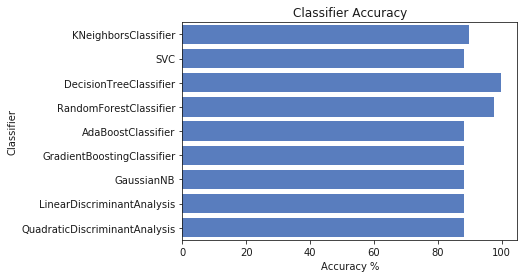

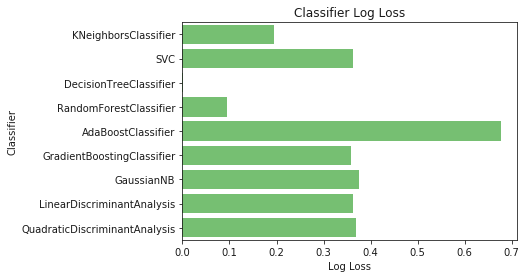

In [124]:
sns.set_color_codes("muted")
sns.barplot(x='Accuracy', y='Classifier', data=log, color="b")

plt.xlabel('Accuracy %')
plt.title('Classifier Accuracy')
plt.show()

sns.set_color_codes("muted")
sns.barplot(x='Log Loss', y='Classifier', data=log, color="g")

plt.xlabel('Log Loss')
plt.title('Classifier Log Loss')
plt.show()

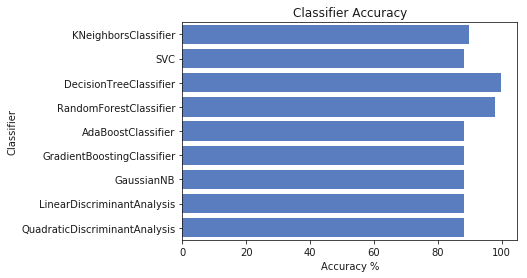

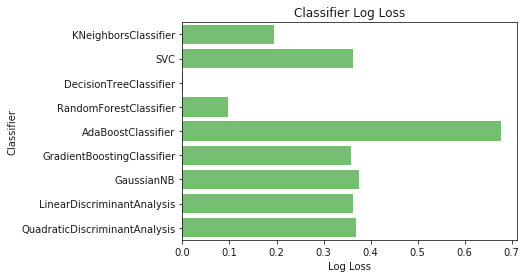

In [40]:
sns.set_color_codes("muted")
sns.barplot(x='Accuracy', y='Classifier', data=log, color="b")

plt.xlabel('Accuracy %')
plt.title('Classifier Accuracy')
plt.show()

sns.set_color_codes("muted")
sns.barplot(x='Log Loss', y='Classifier', data=log, color="g")

plt.xlabel('Log Loss')
plt.title('Classifier Log Loss')
plt.show()